In [12]:
%matplotlib inline
import first
import thinkstats2
import thinkplot
import numpy as np

PMFs are fine, but as the number of values becomes very large, the probability associated with each value gets smaller and the effect of random noise increases.


In [2]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= youre_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

## this is much more efficient
## uses percentile rank to compute the index
## of the corresponding percentile
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores) - 1) // 100
    return scores[index]

**percentile rank** - takes a value and computes its percentile rank in a set of values.

**percentile** - takes a percentile rank and computes the corresponding value.

**Cumulative Distribution Function** - maps from a value to its percentile rank.  CDF(x) is the fraction of values in the distribution less than or equal to x.

In [3]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

Why is this reported as a probability in the range of 0 to 1?

*  for one thing, you ca evaluate values that aren't in the sample.

####Representing CDFs:
`Prob(x)` -- given a value x, computes the p = CDF(x).  Bracket operator does same thing.

`Value(p)` -- Given a probability, p, computes the corresponding value.

`PercentileRank(x)` -- Given a value x, coputes its percentile rank, 100 * CDF(x)

`Percentile(p)` -- Given a percentile rank, computes the corresponding value, x, Equivalent to Value(p/100)

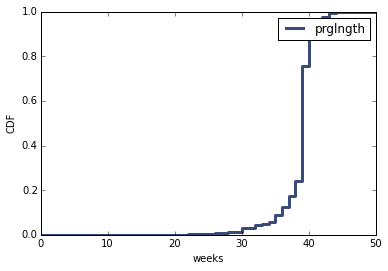

In [9]:
live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

given this plot, we can infer that about 10% of pregnancies are shorter than 36 weeks.  About 90% are shorter than 41 weeks.

CDFs are particularly useful for comparing distributions

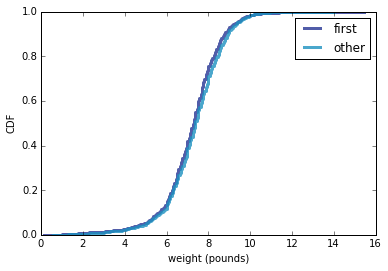

In [10]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label="first")
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

**median** - 50th percentile, the value that divides the distribution in half.

**interquartile range (IQR)** -- measure of spread of a distribution, difference between 75th and 25th percentiles.

**quantile** -- divisions of a CDF into equally spaced points.

###Random Numbers:

/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


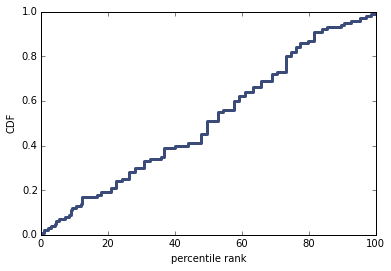

In [13]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

Note that the CDF is a straight line, which means that the distribution is uniform.

*Aside:* What did we do here?  We made a cumulative distribution of the percentile ranks of a random sample from a population.  This is a straight line because the values closer to the mean/median/mode account for a wider range of percentage values than the extremes.

**Algorithm for Generating random numbers within a given CDF** -- 
1  Choose a percentile rank uniformly from range(0-100)
2  Use Cdf.Percentile to find the value in the distribution that correponds to the percentile rank you chose.

`Cdf.Random` returns the percentile value for a randomly chosen percentile rank.

`Cdf.Sample` takes an integer n and returns a list of n values chosen at random from the Cdf.

###Comparing percentile Ranks

If I am in 90th percentile for my age group now.  How fast can I expect to run in 10 years.  The answer is to find the percentile value corresponding to my percentile rank in the distribution of runners 10 years older.

In [14]:
def PositionToPercentile(position, field_size):
    #beat or tied...
    beat = field_size - position + 1
    percentile = 100.0 * beat / field_size
    return percentile

def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    return position